<a href="https://colab.research.google.com/github/bsivavenu/Machine-Learning/blob/master/opencv_av.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving index.png to index.png
User uploaded file "index.png" with length 8218 bytes


In [0]:
ls

1.jpeg  index.png  sample_data/


In [0]:
from skimage.color import  rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import  ndimage

(192, 263, 3)


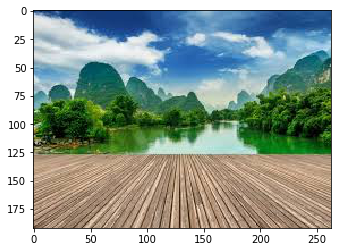

In [0]:
image = plt.imread('1.jpeg')
print(image.shape)
plt.imshow(image)

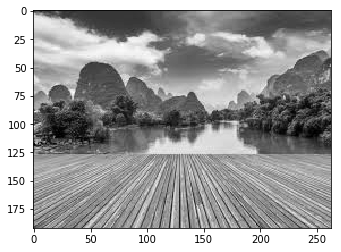

In [0]:
gray = rgb2gray(image)
plt.imshow(gray,cmap = 'gray')

In [0]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
# for i in range(gray_r.shape[0]):
gray_r


array([0.2348498 , 0.34465373, 0.37994784, ..., 0.39810118, 0.52751294,
       0.63339529])

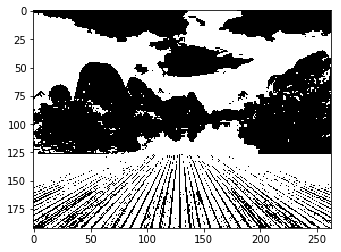

In [0]:
for i in range(gray_r.shape[0]):
  if gray_r[i] > gray_r.mean():
    gray_r[i] = 1
  else:
    gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray,cmap = 'gray')
  

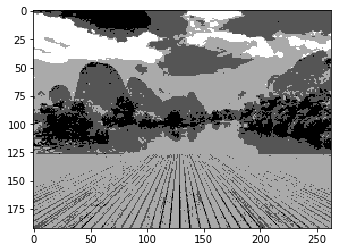

In [0]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

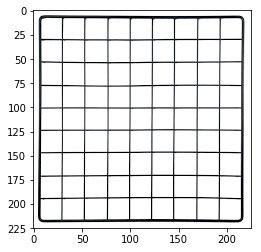

In [0]:
image = plt.imread('index.png')
plt.imshow(image)

In [0]:
gray = rgb2gray(image)

#horizantal
sobel_horizantal = np.array([np.array([1,2,1]),np.array([0,0,0]),np.array([-1,-2,-1])])
print(sobel_horizantal, 'is a kernel for detecting horizontal edges')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges


In [0]:
#vertical
sobel_vertical = np.array([np.array([-1,0,1]),np.array([-2,0,2]),np.array([-1,0,1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


In [0]:
out_h = ndimage.convolve(gray,sobel_horizantal,mode='reflect')
out_v = ndimage.convolve(gray,sobel_vertical,mode='reflect')

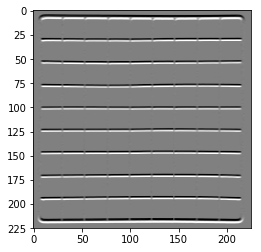

In [0]:
plt.imshow(out_h,cmap = 'gray')

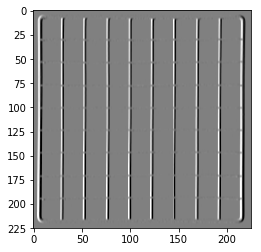

In [0]:
plt.imshow(out_v,cmap = 'gray')

In [0]:
kernel_laplace = np.array([np.array([1,1,1]),np.array([1,-8,1]),np.array([1,1,1])])
print(kernel_laplace)

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]]


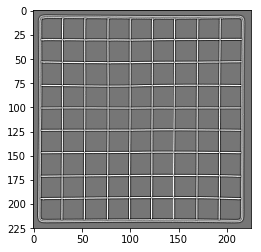

In [0]:
out_l = ndimage.convolve(gray,kernel_laplace,mode='reflect')
plt.imshow(out_l,cmap = 'gray')

(192, 263, 3)


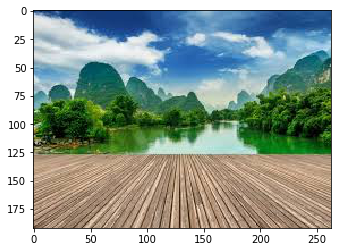

In [0]:
pic = plt.imread('1.jpeg')/255
print(pic.shape)
plt.imshow(pic)

In [0]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1],pic.shape[2])
pic_n.shape

(50496, 3)

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

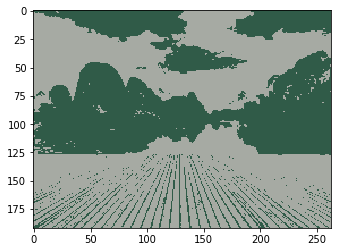

In [0]:
cluster_pic = pic2show.reshape(pic.shape[0],pic.shape[1],pic.shape[2])
plt.imshow(cluster_pic)